# 🤖 Proyecto de detección de spam

En este proyecto entrenaremos un modelo de clasificación binaria para que determine si un mensaje de telegram es considerando spam o no, para ello emplearemos técnica de procesamiento de lenguaje natural (NPL).

`@author Daniel Ramírez Vaquero`

`@author Natalie Pilkington`

### Importación de librerías

In [ ]:
# %pip install numpy matplotlib pandas scikit-learn seaborn wordcloud

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Obtención de datos

Fuentes: 
- [telegram-spam-ham(English)](https://huggingface.co/datasets/thehamkercat/telegram-spam-ham/blob/dbf0a97b4b8cb0a8223378c85b6fc7e4526d43fb/dataset.csv)
- [telegram-spam-o_no(Español)](#)

In [2]:
english_filepath = 'data/english.csv'

english_df = pd.read_csv(english_filepath)

## Exploración y visualización de datos

In [3]:
english_df

,text_type,text
0,spam,naturally irresistible your corporate identity...
1,spam,the stock trading gunslinger fanny is merrill ...
2,spam,unbelievable new homes made easy im wanting to...
3,spam,4 color printing special request additional in...
4,spam,do not have money get software cds from here s...
...,...,...
20343,ham,/ban
20344,ham,/ban
20345,ham,/ban
20346,ham,Kaisi hii


Columnas:

- `text_type`: Tiene dos valores *spam* o *ham* si el mensaje es spam o no.
- `text`: Texto del mensaje evaluado.

In [4]:
english_df.describe()


,text_type,text
count,20348,20348
unique,2,20334
top,ham,SPAM ALERT 🚔 User: Username: @DillyBubbl...
freq,14337,8


In [5]:
english_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20348 entries, 0 to 20347
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text_type  20348 non-null  object
 1   text       20348 non-null  object
dtypes: object(2)
memory usage: 318.1+ KB


Tras esta primera exploración podemos ver que no tenemos valores nulos y que nuestras dos columnas son de timpo `object`(String).

Veamos que proporción tenemos de mensajes de spam y cuanto que no lo son.

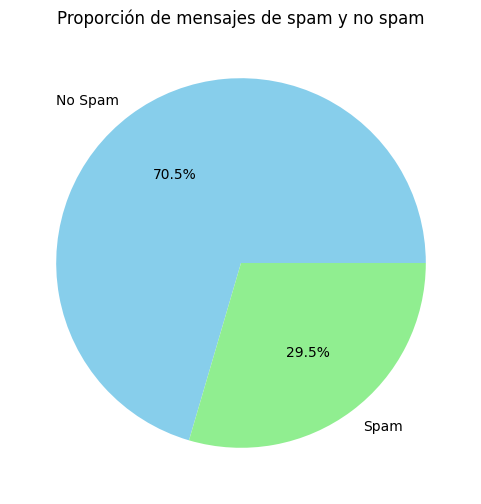

In [7]:
plt.figure(figsize=(6, 6))
english_df['text_type'].value_counts().rename(index={'spam': 'Spam', 'ham': 'No Spam'}).plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Proporción de mensajes de spam y no spam')
plt.ylabel('')
plt.show()

Sería interesante ver las palabras más usadas en los mensajes de spam ya que estas nos darán la clave para determinar si el mensaje es spam o no.

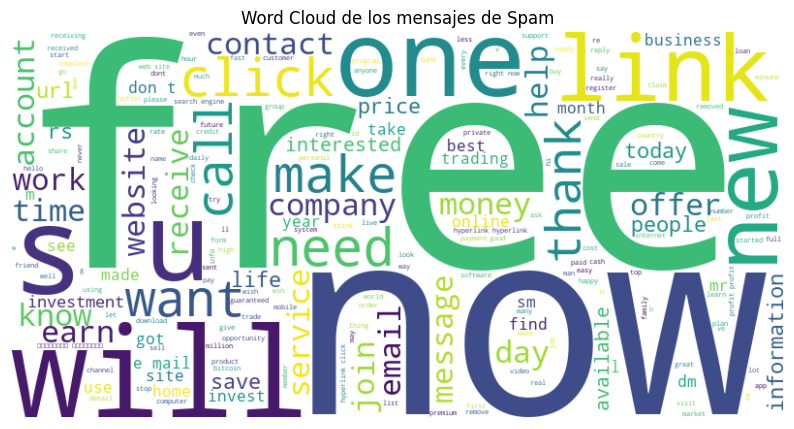

In [16]:
from wordcloud import WordCloud

# Generar el texto de spam
spam_text = ' '.join(english_df[english_df['text_type'] == 'spam']['text'])

# Crear la nube de palabras con una paleta de colores diferente
spam_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(spam_text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Word Cloud de los mensajes de Spam')
plt.axis('off')
plt.show()

Por último podemos ver un histograma comparando la longitud de los mensajes de spam y de no spam.

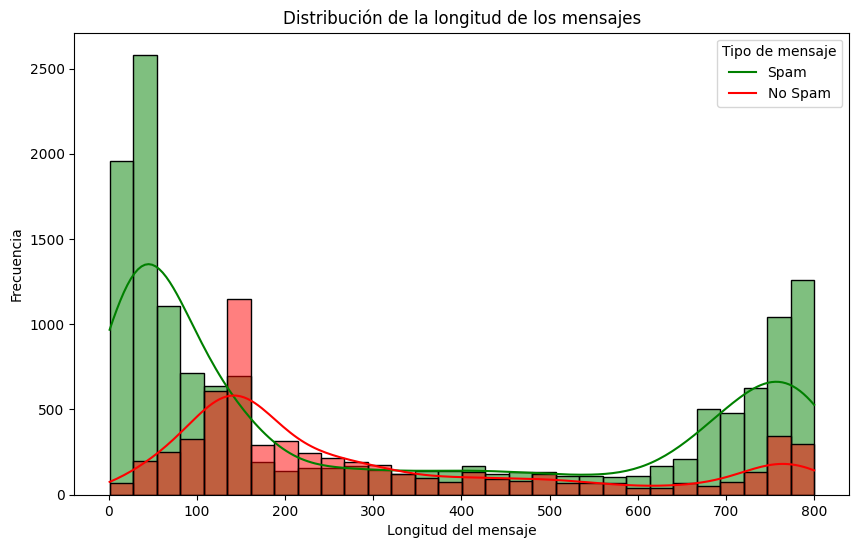

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(english_df, x=english_df['text'].apply(len), hue='text_type', bins=30, kde=True, palette={'spam': 'red', 'ham': 'green'})
plt.title('Distribución de la longitud de los mensajes')
plt.xlabel('Longitud del mensaje')
plt.ylabel('Frecuencia')
plt.legend(title='Tipo de mensaje', labels=['Spam', 'No Spam'])
plt.show()